In [1]:
## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

In [2]:
# data = pd.read_csv("data/dataset_mood_smartphone.csv").rename(columns={"Unnamed: 0": "index", "time": "date" })


# data['date'] = data['date'].str.split(" ").str.get(0)
# data["date"] = pd.to_datetime(data["date"])


# data["month"] = data["date"].dt.month
# data["day"] = data["date"].dt.day
# data["day_of_week"] = data["date"].dt.day_of_week



# # check if nans
# # nans = data[data.isna().any(axis=1)]
# # nans

# # remove the nans
# data = data.dropna()
# data = data.drop(["index"], axis=1)


data = pd.read_csv("data/data_processed.csv", low_memory=False)
data


,id,date,variable,value,month,day,day_of_week
0,AS14.01,2014-02-26,mood,6.000,2,26,2
1,AS14.01,2014-02-26,mood,6.000,2,26,2
2,AS14.01,2014-02-26,mood,6.000,2,26,2
3,AS14.01,2014-02-26,mood,7.000,2,26,2
4,AS14.01,2014-02-27,mood,6.000,2,27,3
...,...,...,...,...,...,...,...
376705,AS14.30,2014-04-11,appCat.weather,8.032,4,11,4
376706,AS14.30,2014-04-19,appCat.weather,3.008,4,19,5
376707,AS14.30,2014-04-26,appCat.weather,7.026,4,26,5
376708,AS14.30,2014-04-27,appCat.weather,23.033,4,27,6


In [12]:
# data = data.set_index("id")
# data.to_csv("data/data_processed.csv")
# data



In [7]:
# feature_data = data[data["variable"] != "mood"]
# label_data = data[data["variable"] == "mood"]


array([[<Axes: title={'center': 'value'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'day_of_week'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'day_of_week'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'day_of_week'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'day_of_week'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'day_of_week'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'day_of_week'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'day_of_week'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'day_of_week'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'day_of_week'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'day_of_week'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'day_of_week'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'day_of_week'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'day_of_week'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'day_of_week'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'day_of_week'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'day_of_week'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'day_of_week'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'day_of_week'}>]], dtype=object)

array([[<Axes: title={'center': 'value'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'day_of_week'}>]], dtype=object)

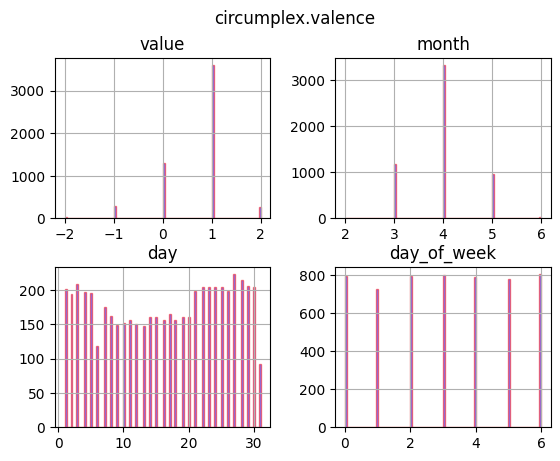

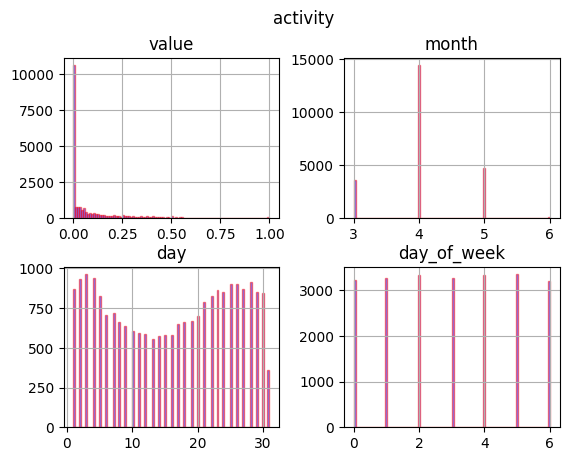

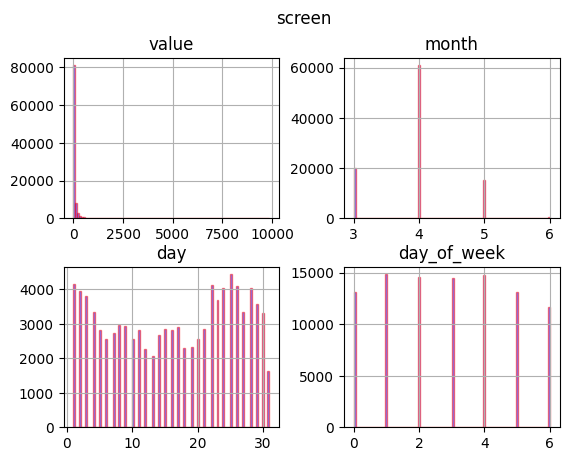

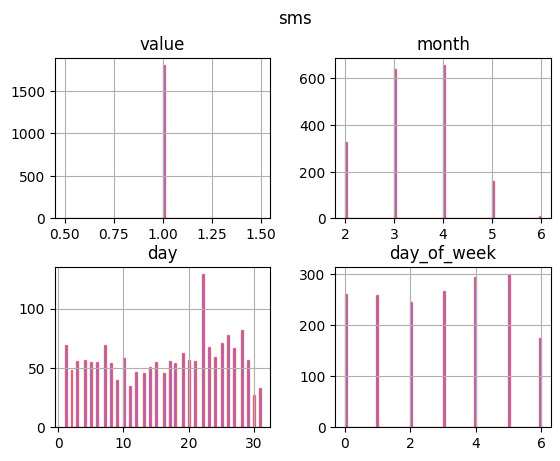

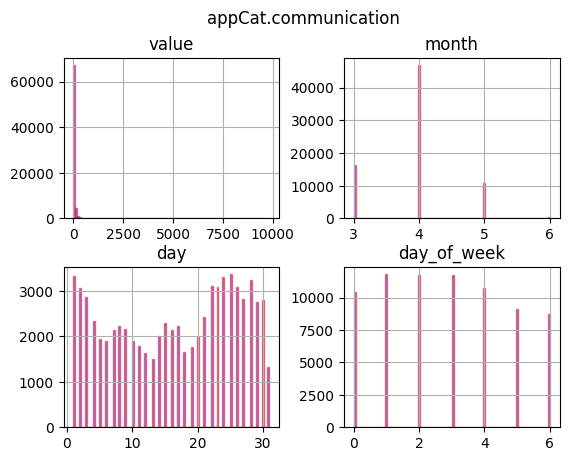

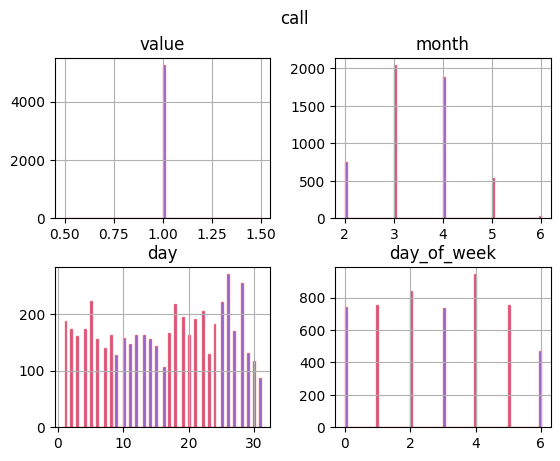

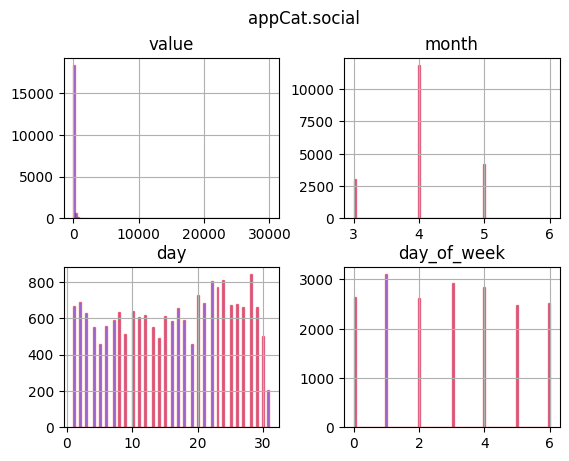

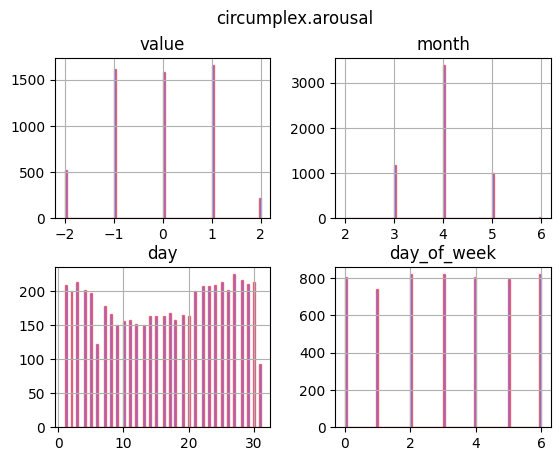

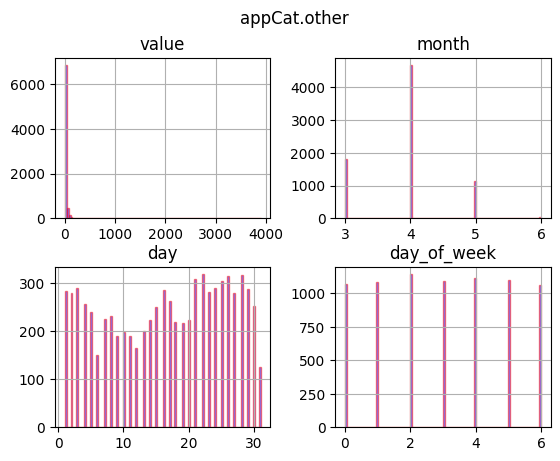

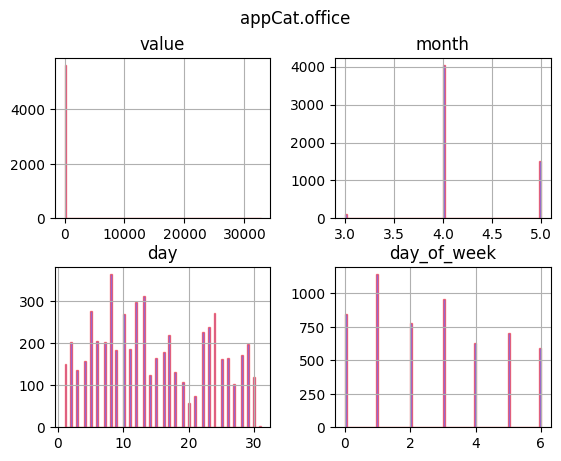

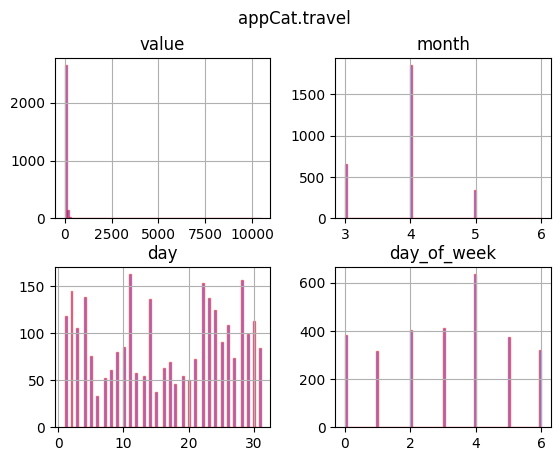

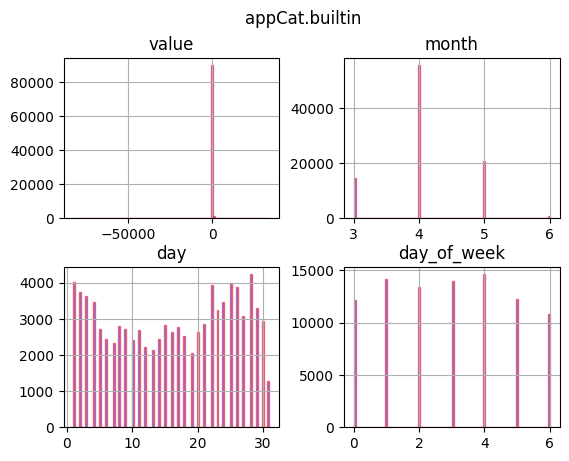

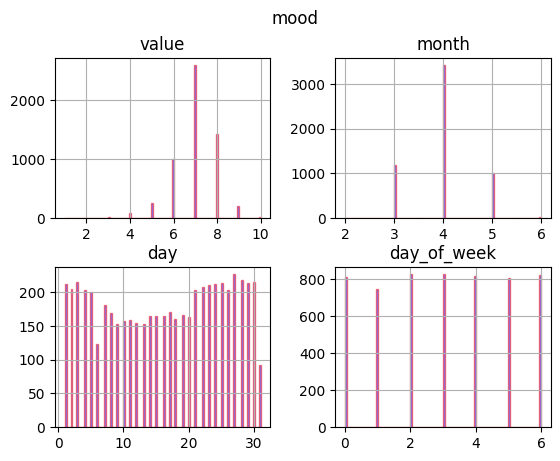

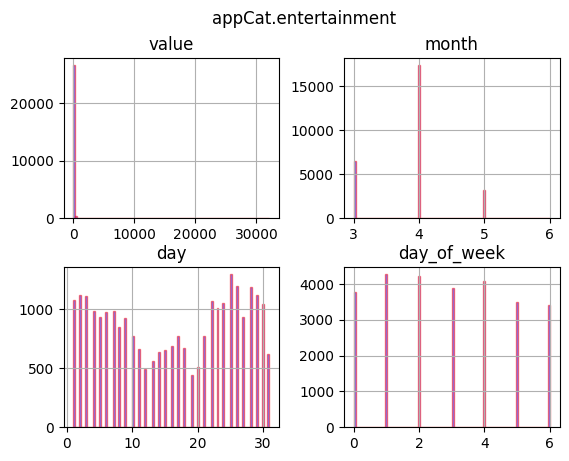

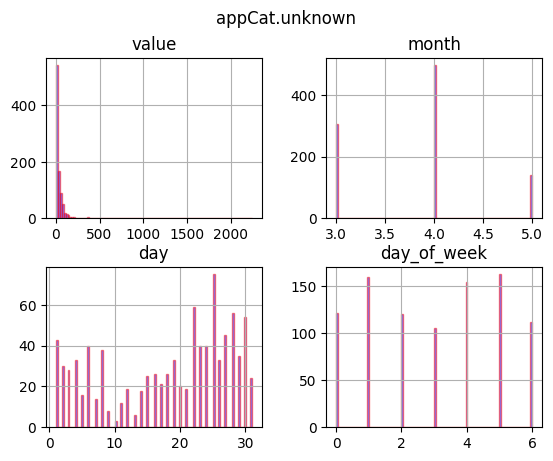

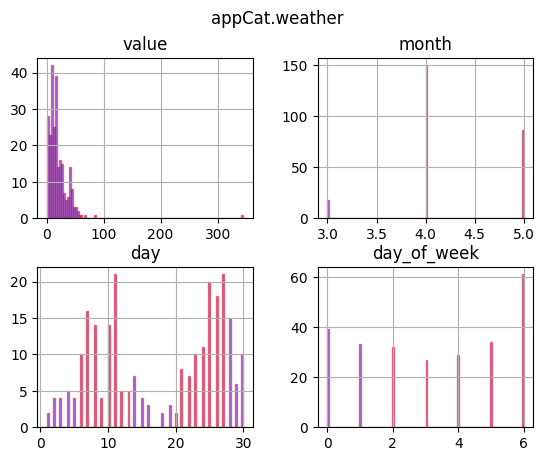

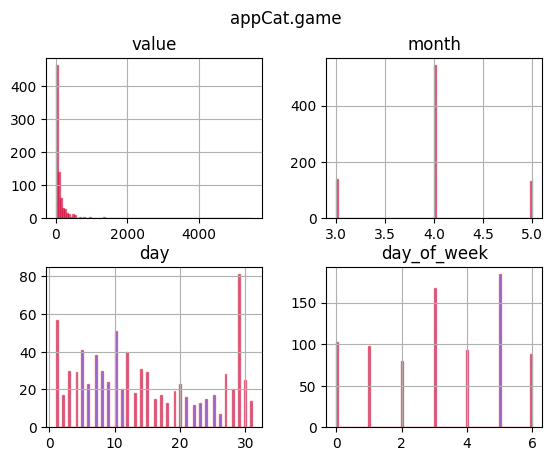

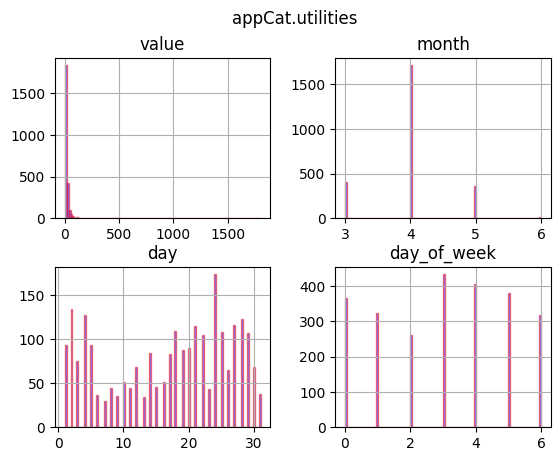

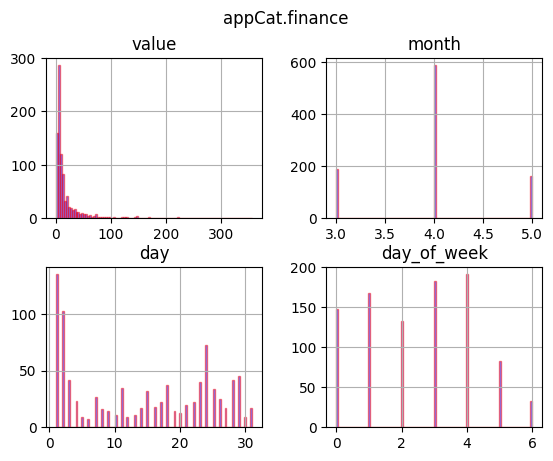

In [15]:
groups = data.groupby(data.variable)
for t in set(v for v in data.variable):
    gd = groups.get_group(t)
    display(gd.hist(bins=100, edgecolor='r', alpha = 0.5, color= 'b'))
    plt.suptitle(t)

In [ ]:
# plot value pp in the same plot per variable

In [7]:
## averages
aggregation_functions = {'value': 'mean'}
aggregations_functions_2 = {'mood_avg' : 'mean', 'utilities_avg' : 'mean', 'social_avg' : 'mean', 'arousal_avg' : 'mean', 'screen_avg' : 'mean', 'office_avg' : 'mean',
       'call_avg' : 'mean', 'other_avg' : 'mean', 'valence_avg' : 'mean', 'unknown_avg' : 'mean', 'sms_avg' : 'mean', 'finance_avg': 'mean',
       'builtin_avg' : 'mean', 'communication_avg' : 'mean', 'activity_avg' : 'mean', 'weather_avg' : 'mean', 'entertainment_avg' : 'mean',
       'game_avg' : 'mean', 'travel_avg' : 'mean', 'mood_avg_next' : 'mean'}


# avg = data.groupby([data['id'], data["date"]]).aggregate(aggregation_functions)
# # label_avg = label_data.groupby([label_data['id'], label_data["day"]]).aggregate(aggregation_functions)
# # label_avg = label_avg.rename(columns={"value": "mood_avg"})
# avg

In [43]:
groups = data.groupby(data.variable)

dfs = []
names = ['mood',
  'appCat.utilities',
 'appCat.social',
 'circumplex.arousal',
 'screen',
 'appCat.office',
 'call',
 'appCat.other',
 'circumplex.valence',
 'appCat.unknown',
 'sms',
 'appCat.finance',
 'appCat.builtin',
 'appCat.communication',
 'activity',
 'appCat.weather',
 'appCat.entertainment',
 'appCat.game',
 'appCat.travel']

names2 = ['mood',
 'utilities',
 'social',
 'arousal',
 'screen',
 'office',
 'call',
 'other',
 'valence',
 'unknown',
 'sms',
 'finance',
 'builtin',
 'communication',
 'activity',
 'weather',
 'entertainment',
 'game',
 'travel']

for t in names:
    df = groups.get_group(t).drop(["variable"], axis=1)
    df["date"] = pd.to_datetime(df["date"])
    # df = df.rename(columns={"value": f"{t}"})
    dfs.append(df)

# dfs[0].groupby([dfs[0]['date'], dfs[0]["id"]]).aggregate(aggregation_functions)


In [42]:
merged = ""
for i in range(19):
    # var_avg = dfs[i].groupby([dfs[i]['id'], dfs[i]["date"]]).aggregate(aggregation_functions)
    var_avg = dfs[i].groupby([dfs[i]['date'], dfs[i]["id"]]).aggregate(aggregation_functions)
    var_avg = var_avg.rename(columns={"value": f"{names2[i]}_avg"})
    if i == 0:
        merged = var_avg
    else:
        merged = merged.join(var_avg)

merged

merged = merged.reset_index()

# merged["date"] = pd.to_datetime(data["date"])


merged["month"] = merged["date"].dt.month
merged["day"] = merged["date"].dt.day
merged["day_of_week"] = merged["date"].dt.day_of_week

# # make val 0 when no call or sms has been made
merged["call_avg"].fillna(0, inplace=True)
merged["sms_avg"].fillna(0, inplace=True)


merged.set_index(["date", "id"], inplace=True)
# merged.set_index(["date"], inplace=True)
merged.to_csv("data_new/merged.csv")
merged

mood_avg  utilities_avg  social_avg  arousal_avg  \
date       id                                                          
2014-02-26 AS14.01  6.250000            NaN         NaN    -0.250000   
2014-02-27 AS14.01  6.333333            NaN         NaN     0.000000   
2014-03-04 AS14.17  7.000000            NaN         NaN     0.500000   
2014-03-05 AS14.08  6.333333            NaN         NaN     0.000000   
           AS14.17  8.000000            NaN         NaN     0.666667   
...                      ...            ...         ...          ...   
2014-06-04 AS14.24  7.000000            NaN   17.234500     0.500000   
2014-06-05 AS14.24  7.000000            NaN   19.107111     0.000000   
2014-06-06 AS14.24  7.500000          2.072         NaN     0.500000   
2014-06-07 AS14.24  8.000000            NaN   53.425000    -1.000000   
2014-06-08 AS14.24  6.500000            NaN  190.760000    -1.500000   

                    screen_avg  office_avg  call_avg  other_avg  valence_avg  \
date       id                                                                  
2014-02-26 AS14.01         NaN         NaN       1.0        NaN     0.750000   
2014-02-27 AS14.01         NaN         NaN       0.0        NaN     0.333333   
2014-03-04 AS14.17         NaN         NaN       1.0        NaN     2.000000   
2014-03-05 AS14.08         NaN         NaN       0.0        NaN     0.333333   
           AS14.17         NaN         NaN       1.0        NaN     1.333333   
...                        ...         ...       ...        ...          ...   
2014-06-04 AS14.24   93.283250         NaN       1.0     7.7548     1.000000   
2014-06-05 AS14.24   40.196424         NaN       1.0     9.4720     1.000000   
2014-06-06 AS14.24   47.953193         NaN       1.0     9.1035     1.000000   
2014-06-07 AS14.24  128.613442         NaN       0.0     6.2140          NaN   
2014-06-08 AS14.24  161.599714         NaN       0.0     9.0345     1.000000   

                    unknown_avg  ...  builtin_avg  communication_avg  \
date       id                    ...                                   
2014-02-26 AS14.01          NaN  ...          NaN                NaN   
2014-02-27 AS14.01          NaN  ...          NaN                NaN   
2014-03-04 AS14.17          NaN  ...          NaN                NaN   
2014-03-05 AS14.08          NaN  ...          NaN                NaN   
           AS14.17          NaN  ...          NaN                NaN   
...                         ...  ...          ...                ...   
2014-06-04 AS14.24          NaN  ...     9.522432          56.443329   
2014-06-05 AS14.24          NaN  ...    13.994216          25.914081   
2014-06-06 AS14.24          NaN  ...     6.568736          38.884636   
2014-06-07 AS14.24          NaN  ...   125.687450          27.257963   
2014-06-08 AS14.24          NaN  ...    19.521611         187.757500   

                    activity_avg  weather_avg  entertainment_avg  game_avg  \
date       id                                                                
2014-02-26 AS14.01           NaN          NaN                NaN       NaN   
2014-02-27 AS14.01           NaN          NaN                NaN       NaN   
2014-03-04 AS14.17           NaN          NaN                NaN       NaN   
2014-03-05 AS14.08           NaN          NaN                NaN       NaN   
           AS14.17           NaN          NaN                NaN       NaN   
...                          ...          ...                ...       ...   
2014-06-04 AS14.24      0.046385          NaN                NaN       NaN   
2014-06-05 AS14.24      0.152343          NaN                NaN       NaN   
2014-06-06 AS14.24      0.189476          NaN                NaN       NaN   
2014-06-07 AS14.24      0.081893          NaN                NaN       NaN   
2014-06-08 AS14.24      0.079510          NaN                NaN       NaN   

                    travel_avg  month  day  day_of_week  
date       id                   

In [4]:
merged = pd.read_csv("data_new/merged.csv")
merged_next = pd.read_csv("data_new/merged_next.csv")
feature_merged = merged_next.loc[:, merged_next.columns != 'mood_avg_next']

merged_sans_nans_1 = pd.read_csv("data_new/merged_sans_nans_1.csv")
merged_sans_nans_1_next = pd.read_csv("data_new/merged_sans_nans_1_next.csv")
feature_merged_sans_nans_1 = merged_sans_nans_1_next.loc[:, merged_sans_nans_1_next.columns != 'mood_avg_next']

merged_sans_nans_2 = pd.read_csv("data_new/merged_sans_nans_2.csv")
merged_sans_nans_2_next = pd.read_csv("data_new/merged_sans_nans_2_next.csv")
feature_merged_sans_nans_2 = merged_sans_nans_2_next.loc[:, merged_sans_nans_2_next.columns != 'mood_avg_next']


In [64]:
aggregations_functions_2 = {'mood_avg' : 'mean', 'utilities_avg' : 'mean', 'social_avg' : 'mean', 'arousal_avg' : 'mean', 'screen_avg' : 'mean', 'office_avg' : 'mean',
       'call_avg' : 'mean', 'other_avg' : 'mean', 'valence_avg' : 'mean', 'unknown_avg' : 'mean', 'sms_avg' : 'mean', 'finance_avg': 'mean',
       'builtin_avg' : 'mean', 'communication_avg' : 'mean', 'activity_avg' : 'mean', 'weather_avg' : 'mean', 'entertainment_avg' : 'mean',
       'game_avg' : 'mean', 'travel_avg' : 'mean'}

In [68]:
new = merged_sans_nans_1.groupby([merged_sans_nans_1["date"]]).aggregate(aggregations_functions_2)
new.reset_index(inplace= True)

new = new.drop([0,1], axis= 0)
new.reset_index(inplace= True, drop = True)
new.head(10)


,date,mood_avg,utilities_avg,social_avg,arousal_avg,screen_avg,office_avg,call_avg,other_avg,valence_avg,unknown_avg,sms_avg,finance_avg,builtin_avg,communication_avg,activity_avg,weather_avg,entertainment_avg,game_avg,travel_avg
0,2014-03-04,7.000000,13.062,33.491833,0.500000,55.066533,17.086,1.0,26.106875,2.000000,25.749571,0.0,8.0384,14.101000,47.864667,0.168068,3.02,36.754,31.647,116.122273
1,2014-03-05,7.166667,13.062,33.491833,0.333333,55.066533,17.086,0.5,26.106875,0.833333,25.749571,0.5,8.0384,14.101000,47.864667,0.168068,3.02,36.754,31.647,116.122273
2,2014-03-06,7.225000,13.062,33.491833,-0.050000,55.066533,17.086,0.5,26.106875,0.675000,25.749571,0.5,8.0384,14.101000,47.864667,0.168068,3.02,36.754,31.647,116.122273
3,2014-03-07,7.450000,13.062,33.491833,0.675000,55.066533,17.086,0.0,26.106875,1.100000,25.749571,0.5,8.0384,14.101000,47.864667,0.168068,3.02,36.754,31.647,116.122273
4,2014-03-08,7.300000,13.062,33.491833,0.200000,55.066533,17.086,0.0,26.106875,0.900000,25.749571,0.0,8.0384,14.101000,47.864667,0.168068,3.02,36.754,31.647,116.122273
5,2014-03-09,7.200000,13.062,33.491833,-0.100000,55.066533,17.086,0.5,26.106875,1.100000,25.749571,0.0,8.0384,14.101000,47.864667,0.168068,3.02,36.754,31.647,116.122273
6,2014-03-10,7.066667,13.062,33.491833,-0.166667,55.066533,17.086,0.0,26.106875,0.633333,25.749571,0.5,8.0384,14.101000,47.864667,0.168068,3.02,36.754,31.647,116.122273
7,2014-03-11,6.400000,13.062,33.491833,0.200000,55.066533,17.086,0.0,26.106875,0.400000,25.749571,0.5,8.0384,14.101000,47.864667,0.168068,3.02,36.754,31.647,116.122273
8,2014-03-12,6.700000,13.062,33.491833,0.400000,55.066533,17.086,0.0,26.106875,0.600000,25.749571,0.0,8.0384,14.101000,47.864667,0.168068,3.02,36.754,31.647,116.122273
9,2014-03-13,7.212500,13.062,138.941958,-0.437500,46.098861,17.086,0.5,41.569419,0.962500,25.749571,0.5,8.0384,7.774617,39.001318,0.168068,3.02,36.754,31.647,116.122273


In [79]:
new_2 = pd.DataFrame()
amount_of_days = 6

for i in new.index:
    new_row = new.iloc[i:i + amount_of_days].drop("date", axis = 1).mean()
    new_row = new_row.to_frame().T
    if len(new_2) == 0:
        new_2 = new_row 
    else:
        new_2 = pd.concat([new_2, new_row])
   
new_2.reset_index(inplace = True, drop = True)

#laatste column toevoegen, mood van de volgende dag 
new_2["mood_avg_next"] = new["mood_avg"].iloc[6:]
new_2["mood_avg_next"] = new_2["mood_avg_next"].shift(-6)

# new_2.fillna(method='ffill', inplace= True)
new_2.ffill(inplace= True)
new_2

# new_2.to_csv("data_new/instance_based_df.csv", index = False)   

In [212]:
## set target label

# # merged.set_index(["date"], inplace=True)
# # Identify indices with multiple rows
# multi_row_indices = merged.groupby(level=0).size()[lambda x: x > 1].index


# # Calculate the average for the specific column
# avg_col = merged['mood_avg'].groupby(level=0).mean()

# merged["mood_avg_next"] = None

# for i, date in enumerate(avg_col.index):
#     if date in multi_row_indices:
#         merged.loc[date, "mood_avg_next"] = avg_col.iloc[i+1]
#     else:
#         if i < len(avg_col) - 1:
#             merged.loc[date, 'mood_avg_next'] = avg_col.iloc[i+1]

# merged.to_csv("data_new/merged_next.csv")
# merged.head(10)


In [224]:



## create sans nans 1

# merged_next["date"] = pd.to_datetime(merged["date"])

# merged_next = merged_next.set_index('date')

# nans = ['utilities_avg', 'social_avg','screen_avg', 'office_avg', 'other_avg', 'valence_avg',
#        'unknown_avg', 'finance_avg', 'builtin_avg','communication_avg', 'activity_avg', 'weather_avg', 
#        'entertainment_avg','game_avg', 'travel_avg']

# merged_next[nans] = merged_next[nans].interpolate(method='time').bfill()
# merged_next.ffill(inplace=True) # only to fill the last target prediction that was removed when shifting ## alleen gebruikt bij merged_next en niet merged
# merged_next.to_csv("data_new/merged_sans_nans_1_next.csv")
# merged


## create sans nans 2

# merged_next["date"] = pd.to_datetime(merged_next["date"])

# merged_next = merged_next.set_index('date')

# merged_sans_nans_2 = merged_next.ffill().bfill()
# merged_sans_nans_2.isna().sum()
# # m.isna().sum()
# merged_sans_nans_2.to_csv("data_new/merged_sans_nans_2_next.csv")

In [226]:
# merged_sans_nans_1.set_index('date', inplace=True)
merged_sans_nans_1.compare(merged_sans_nans_2, keep_shape=True,  result_names=("interpolate", "ffill")) # show that there is a difference between interpolate/bbfill and ffill/bfill but mostly similair


date                id          mood_avg       utilities_avg  \
     interpolate ffill interpolate ffill interpolate ffill   interpolate   
0            NaN   NaN         NaN   NaN         NaN   NaN           NaN   
1            NaN   NaN         NaN   NaN         NaN   NaN           NaN   
2            NaN   NaN         NaN   NaN         NaN   NaN           NaN   
3            NaN   NaN         NaN   NaN         NaN   NaN           NaN   
4            NaN   NaN         NaN   NaN         NaN   NaN           NaN   
...          ...   ...         ...   ...         ...   ...           ...   
1263         NaN   NaN         NaN   NaN         NaN   NaN      2.381467   
1264         NaN   NaN         NaN   NaN         NaN   NaN      2.226733   
1265         NaN   NaN         NaN   NaN         NaN   NaN           NaN   
1266         NaN   NaN         NaN   NaN         NaN   NaN           NaN   
1267         NaN   NaN         NaN   NaN         NaN   NaN           NaN   

              social_avg             ...    game_avg        travel_avg  \
       ffill interpolate      ffill  ... interpolate ffill interpolate   
0        NaN         NaN        NaN  ...         NaN   NaN         NaN   
1        NaN         NaN        NaN  ...         NaN   NaN         NaN   
2        NaN         NaN        NaN  ...         NaN   NaN         NaN   
3        NaN         NaN        NaN  ...         NaN   NaN         NaN   
4        NaN         NaN        NaN  ...         NaN   NaN         NaN   
...      ...         ...        ...  ...         ...   ...         ...   
1263  2.5362         NaN        NaN  ...         NaN   NaN   68.970484   
1264  2.5362         NaN        NaN  ...         NaN   NaN         NaN   
1265     NaN   36.266056  19.107111  ...         NaN   NaN         NaN   
1266     NaN         NaN        NaN  ...         NaN   NaN         NaN   
1267     NaN         NaN        NaN  ...         NaN   NaN         NaN   

                      month               day       day_of_week        
          ffill interpolate ffill interpolate ffill interpolate ffill  
0           NaN         NaN   NaN         NaN   NaN         NaN   NaN  
1           NaN         NaN   NaN         NaN   NaN         NaN   NaN  
2           NaN         NaN   NaN         NaN   NaN         NaN   NaN  
3           NaN         NaN   NaN         NaN   NaN         NaN   NaN  
4           NaN         NaN   NaN         NaN   NaN         NaN   NaN  
...         ...         ...   ...         ...   ...         ...   ...  
1263  37.594571         NaN   NaN         NaN   NaN         NaN   NaN  
1264        NaN         NaN   NaN         NaN   NaN         NaN   NaN  
1265        NaN         NaN   NaN         NaN   NaN         NaN   NaN  
1266        NaN         NaN   NaN         NaN   NaN         NaN   NaN  
1267        NaN         NaN   NaN         NaN   NaN         NaN   NaN  

[1268 rows x 48 columns]

In [227]:
merged_sans_nans_1_next.compare(merged_sans_nans_2_next, keep_shape=True,  result_names=("interpolate", "ffill")) # show that there is a difference between interpolate/bbfill and ffill/bfill but mostly similair

date                id          mood_avg       utilities_avg  \
     interpolate ffill interpolate ffill interpolate ffill   interpolate   
0            NaN   NaN         NaN   NaN         NaN   NaN           NaN   
1            NaN   NaN         NaN   NaN         NaN   NaN           NaN   
2            NaN   NaN         NaN   NaN         NaN   NaN           NaN   
3            NaN   NaN         NaN   NaN         NaN   NaN           NaN   
4            NaN   NaN         NaN   NaN         NaN   NaN           NaN   
...          ...   ...         ...   ...         ...   ...           ...   
1263         NaN   NaN         NaN   NaN         NaN   NaN      2.381467   
1264         NaN   NaN         NaN   NaN         NaN   NaN      2.226733   
1265         NaN   NaN         NaN   NaN         NaN   NaN           NaN   
1266         NaN   NaN         NaN   NaN         NaN   NaN           NaN   
1267         NaN   NaN         NaN   NaN         NaN   NaN           NaN   

              social_avg             ...  travel_avg                  month  \
       ffill interpolate      ffill  ... interpolate      ffill interpolate   
0        NaN         NaN        NaN  ...         NaN        NaN         NaN   
1        NaN         NaN        NaN  ...         NaN        NaN         NaN   
2        NaN         NaN        NaN  ...         NaN        NaN         NaN   
3        NaN         NaN        NaN  ...         NaN        NaN         NaN   
4        NaN         NaN        NaN  ...         NaN        NaN         NaN   
...      ...         ...        ...  ...         ...        ...         ...   
1263  2.5362         NaN        NaN  ...   68.970484  37.594571         NaN   
1264  2.5362         NaN        NaN  ...         NaN        NaN         NaN   
1265     NaN   36.266056  19.107111  ...         NaN        NaN         NaN   
1266     NaN         NaN        NaN  ...         NaN        NaN         NaN   
1267     NaN         NaN        NaN  ...         NaN        NaN         NaN   

                   day       day_of_week       mood_avg_next        
     ffill interpolate ffill interpolate ffill   interpolate ffill  
0      NaN         NaN   NaN         NaN   NaN           NaN   NaN  
1      NaN         NaN   NaN         NaN   NaN           NaN   NaN  
2      NaN         NaN   NaN         NaN   NaN           NaN   NaN  
3      NaN         NaN   NaN         NaN   NaN           NaN   NaN  
4      NaN         NaN   NaN         NaN   NaN           NaN   NaN  
...    ...         ...   ...         ...   ...           ...   ...  
1263   NaN         NaN   NaN         NaN   NaN           NaN   NaN  
1264   NaN         NaN   NaN         NaN   NaN           NaN   NaN  
1265   NaN         NaN   NaN         NaN   NaN           NaN   NaN  
1266   NaN         NaN   NaN         NaN   NaN           NaN   NaN  
1267   NaN         NaN   NaN         NaN   NaN           NaN   NaN  

[1268 rows x 50 columns]

In [228]:

# merged_sans_nans_1

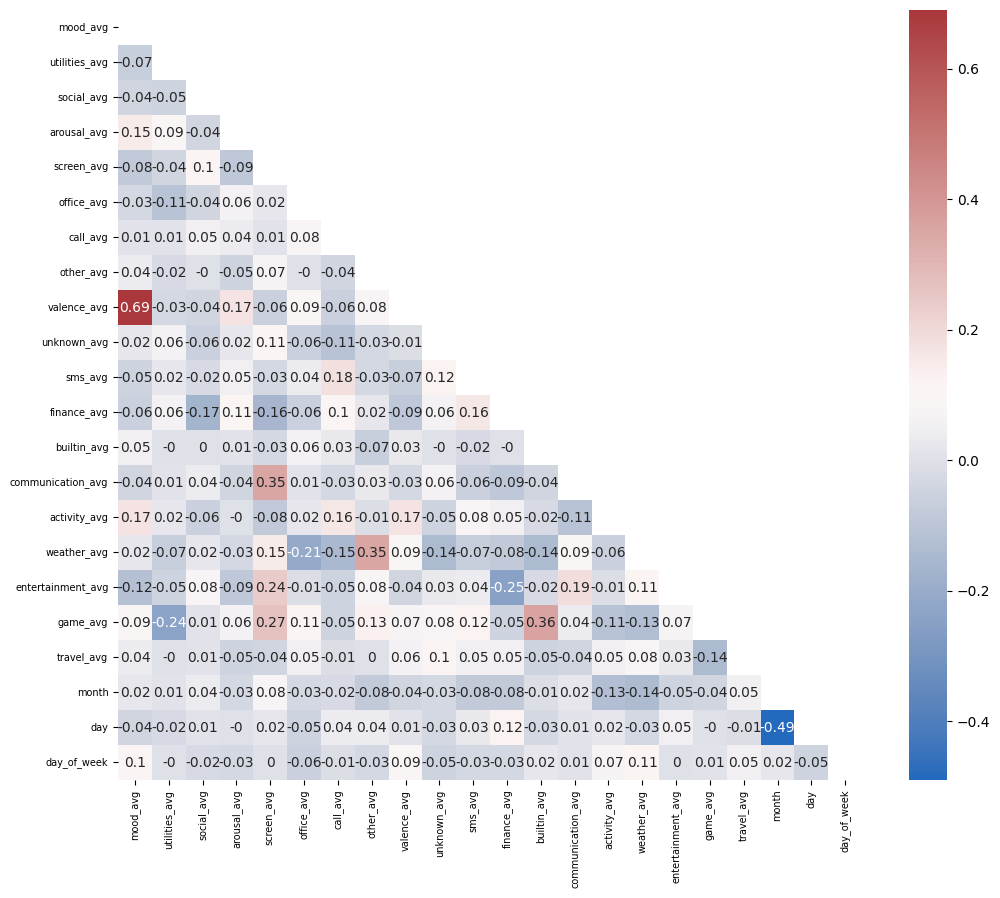

In [121]:
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(figsize=(12, 10))

mat = merged.iloc[: , 2:].corr().round(2)
mat2 = merged_sans_nans_1.iloc[: , 2:].corr().round(2)
mat3 = merged_sans_nans_2.iloc[: , 2:].corr().round(2)

mask = np.triu(np.ones_like(mat, dtype=bool))
mask2 = np.triu(np.ones_like(mat2, dtype=bool))
mask3 = np.triu(np.ones_like(mat3, dtype=bool))

plt.xticks(fontsize = 7) 
plt.yticks(fontsize = 7) 

# standard
sns.heatmap(mat, annot=True, cmap="vlag", mask=mask)
plt.show()


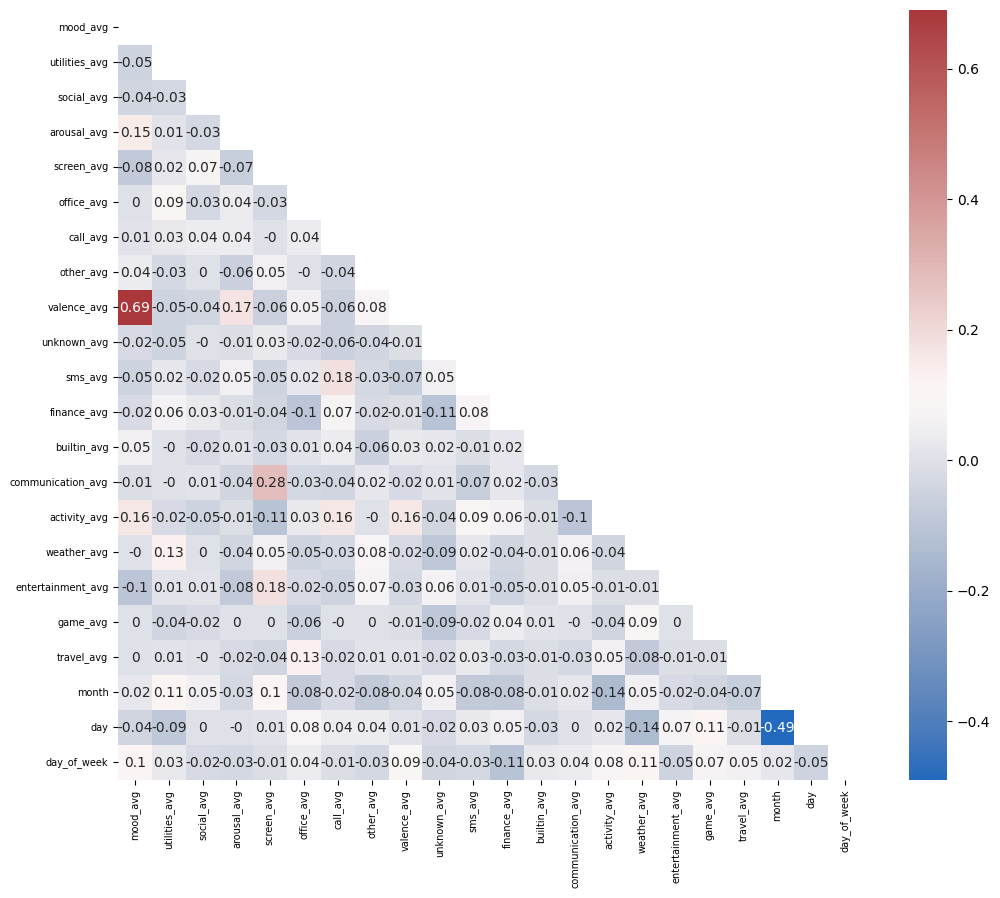

In [124]:
# sans nans 1 (interpolate)
fig, ax = plt.subplots(figsize=(12, 10))
plt.xticks(fontsize = 7) 
plt.yticks(fontsize = 7) 

sns.heatmap(mat2, annot=True, cmap = "vlag", mask=mask2)

plt.show()


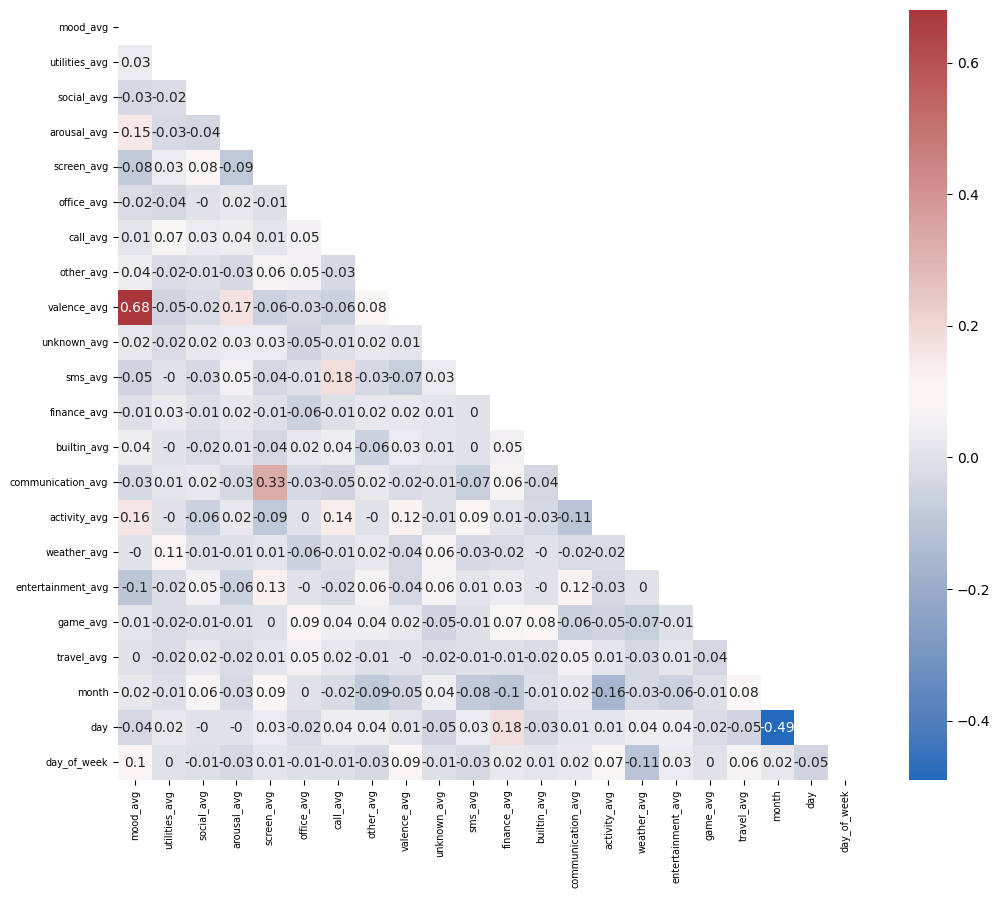

In [125]:
# sans nans 2 (forward fill)
fig, ax = plt.subplots(figsize=(12, 10))
plt.xticks(fontsize = 7) 
plt.yticks(fontsize = 7) 

sns.heatmap(mat3, annot=True, cmap = "vlag", mask=mask3)
plt.show()

In [ ]:
# hierboven zien we negatieve correlatie tussen tijd op scherm en communicatie apps en activiteit en positieve correlatie tussen valence en arousal
# welke corra=elaties nog meerr??


In [260]:
merged = pd.read_csv("data_new/merged.csv")
merged_next = pd.read_csv("data_new/merged_next.csv")
feature_merged = merged_next.loc[:, merged_next.columns != 'mood_avg_next']

merged_sans_nans_1 = pd.read_csv("data_new/merged_sans_nans_1.csv")
merged_sans_nans_1_next = pd.read_csv("data_new/merged_sans_nans_1_next.csv")
feature_merged_sans_nans_1 = merged_sans_nans_1_next.loc[:, merged_sans_nans_1_next.columns != 'mood_avg_next']

merged_sans_nans_2 = pd.read_csv("data_new/merged_sans_nans_2.csv")
merged_sans_nans_2_next = pd.read_csv("data_new/merged_sans_nans_2_next.csv")
feature_merged_sans_nans_2 = merged_sans_nans_2_next.loc[:, merged_sans_nans_2_next.columns != 'mood_avg_next']

merged_sans_nans_1_next["mood_avg_next"].round().unique()
avg_all = merged_next.loc[:, 'mood_avg'].mean()
filtered = merged_next.loc[merged_next["mood_avg_next"] < avg_all]
filtered


,date,id,mood_avg,utilities_avg,social_avg,arousal_avg,screen_avg,office_avg,call_avg,other_avg,...,communication_avg,activity_avg,weather_avg,entertainment_avg,game_avg,travel_avg,month,day,day_of_week,mood_avg_next
0,2014-02-26,AS14.01,6.250000,NaN,NaN,-0.250000,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,26,2,6.333333
13,2014-03-10,AS14.08,6.800000,NaN,NaN,-1.000000,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,10,0,6.400000
14,2014-03-10,AS14.17,7.333333,NaN,NaN,0.666667,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,10,0,6.400000
15,2014-03-11,AS14.08,6.600000,NaN,NaN,0.400000,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,11,1,6.700000
16,2014-03-11,AS14.17,6.200000,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,11,1,6.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2014-05-29,AS14.33,7.000000,1.5995,198.880222,-1.333333,118.978033,NaN,1.0,9.734000,...,54.388125,0.169354,NaN,68.369,NaN,0.939,5,29,3,6.866667
1258,2014-05-31,AS14.24,7.000000,NaN,NaN,1.000000,31.575519,NaN,0.0,7.019000,...,48.038154,0.212520,NaN,NaN,NaN,NaN,5,31,5,6.833333
1259,2014-05-31,AS14.33,7.000000,NaN,NaN,-2.000000,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5,31,5,6.833333
1260,2014-06-01,AS14.24,6.833333,NaN,94.996000,-1.000000,56.324955,NaN,1.0,11.581286,...,115.465700,0.047363,NaN,NaN,NaN,NaN,6,1,6,6.750000


              precision    recall  f1-score   support

         6.0       0.44      0.44      0.44         9
         7.0       0.97      0.98      0.97       242
         8.0       0.50      0.33      0.40         3

    accuracy                           0.95       254
   macro avg       0.64      0.58      0.61       254
weighted avg       0.95      0.95      0.95       254



ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (4).

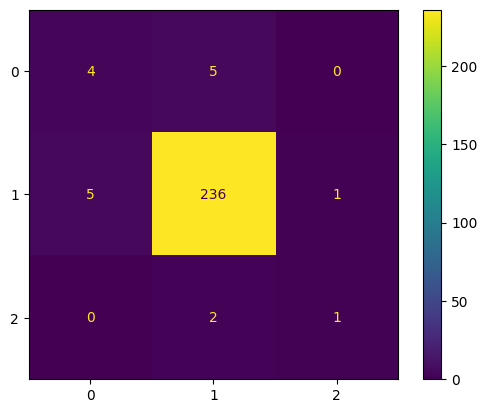

In [236]:
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np

labels = merged_next["mood_avg_next"].round()
X = feature_merged.iloc[:, 2:]

y = np.array(labels, dtype=str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

m = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = m.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=m.classes_)
disp.plot()

              precision    recall  f1-score   support

         6.0       0.86      0.67      0.75         9
         7.0       0.98      1.00      0.99       242
         8.0       1.00      0.33      0.50         3

    accuracy                           0.98       254
   macro avg       0.95      0.67      0.75       254
weighted avg       0.98      0.98      0.98       254



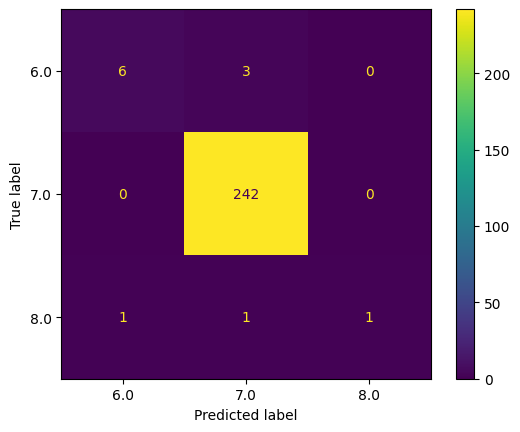

In [237]:
labels = merged_sans_nans_1_next["mood_avg_next"].round()
X = feature_merged_sans_nans_1.iloc[:, 2:]

y = np.array(labels, dtype=str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

m = RandomForestClassifier().fit(X_train, y_train)
y_pred = m.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=m.classes_)
disp.plot()

              precision    recall  f1-score   support

         6.0       0.86      0.67      0.75         9
         7.0       0.98      1.00      0.99       242
         8.0       1.00      0.33      0.50         3

    accuracy                           0.98       254
   macro avg       0.95      0.67      0.75       254
weighted avg       0.98      0.98      0.98       254



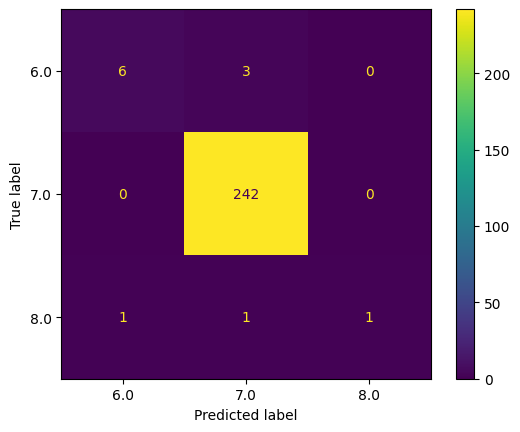

In [238]:
labels = merged_sans_nans_2_next["mood_avg_next"].round()
X = feature_merged_sans_nans_2.iloc[:, 2:]

y = np.array(labels, dtype=str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

m = RandomForestClassifier().fit(X_train, y_train)
y_pred = m.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=m.classes_)
disp.plot()

In [ ]:
tscv = TimeSeriesSplit()

for train_index, test_index in tscv.split(X):
     print("TRAIN:", train_index, "TEST:", test_index)

     #To get the indices 
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]